In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


In [86]:
dataku2016=pd.read_csv("data-penjualan-dan-pajak-bbm-tahun-2016.csv")
dataku2015=pd.read_csv("data-penjualan-dan-pajak-bbm-tahun-2015.csv")

In [87]:
#Menggabungkan data
datakuGabung=pd.concat([dataku2016,dataku2015],join="inner")
datakuGabung.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   bulan                         360 non-null    int64 
 1   stasiun_pengisian_bahanbakar  360 non-null    object
 2   jenis_bahanbakar              360 non-null    object
 3   jumlah_penjualan              360 non-null    int64 
 4   penerimaan_pajak              360 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.9+ KB


In [88]:
datakuGabung.head()

,bulan,stasiun_pengisian_bahanbakar,jenis_bahanbakar,jumlah_penjualan,penerimaan_pajak
0,1,Pertamina,Bio Solar,42407041,10525855948
1,1,Pertamina,Solar,23003789,6199987321
2,1,Pertamina,Premium,134009663,41428120949
3,1,Pertamina,Pertalite,15232000,5229147971
4,1,Pertamina,Pertamax,34835000,12816101073


In [89]:
#Hasl gabungan data dijadikan 1 file csv
dataku=datakuGabung.to_csv("databbm.csv",index=False)

In [90]:
dataku=pd.read_csv("databbm.csv")
dataku.head()

,bulan,stasiun_pengisian_bahanbakar,jenis_bahanbakar,jumlah_penjualan,penerimaan_pajak
0,1,Pertamina,Bio Solar,42407041,10525855948
1,1,Pertamina,Solar,23003789,6199987321
2,1,Pertamina,Premium,134009663,41428120949
3,1,Pertamina,Pertalite,15232000,5229147971
4,1,Pertamina,Pertamax,34835000,12816101073


In [91]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   bulan                         360 non-null    int64 
 1   stasiun_pengisian_bahanbakar  360 non-null    object
 2   jenis_bahanbakar              360 non-null    object
 3   jumlah_penjualan              360 non-null    int64 
 4   penerimaan_pajak              360 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.2+ KB


# Preprocessing data bulan menjadi object

In [92]:
dataku['bulan']=dataku['bulan'].astype(str)
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   bulan                         360 non-null    object
 1   stasiun_pengisian_bahanbakar  360 non-null    object
 2   jenis_bahanbakar              360 non-null    object
 3   jumlah_penjualan              360 non-null    int64 
 4   penerimaan_pajak              360 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 14.2+ KB


In [93]:
# #Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dataku.describe()

,jumlah_penjualan,penerimaan_pajak
count,3.600000e+02,3.600000e+02
mean,1.572236e+07,4.960215e+09
std,3.345527e+07,1.037035e+10
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,6.640000e+05,4.423370e+08
75%,1.522600e+07,4.961402e+09
max,1.556153e+08,4.932697e+10


In [94]:
#Mencari dan menangani missing values.
#Ternyata data kita tidak ada missing values.
dataku.isnull().sum()


bulan                           0
stasiun_pengisian_bahanbakar    0
jenis_bahanbakar                0
jumlah_penjualan                0
penerimaan_pajak                0
dtype: int64

Data diatas tidak ada missing value

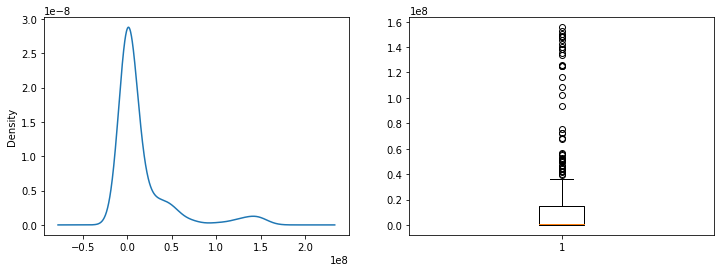

In [95]:
#Univariate analysis Jumlah penjualan
#Melihat distribusi dari Jumlah penjualan
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataku['jumlah_penjualan'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataku['jumlah_penjualan'])
plt.show()

# Data jumlah penjualan memiliki banyak outlier
# Data mean dan mediannya terpusat pada nilai 0.0
# Distribusinya lebih ke right skew

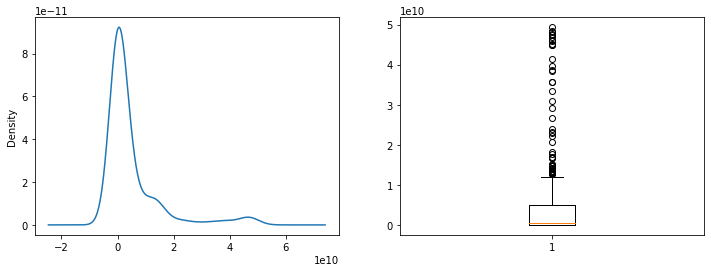

In [96]:
#Univariate analysis penerimaan pajak
#Melihat distribusi dari penerimaan pajak
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataku['penerimaan_pajak'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataku['penerimaan_pajak'])
plt.show()

# Sama dengan jumlah penjualan, data penerimaan pajak juga memiliki banyak outlier
# Data jumlah penjualan memiliki banyak outlier
# Data mean dan mediannya terpusat pada nilai 0
# Distribusinya lebih ke left skew karena mean nya lebih besar

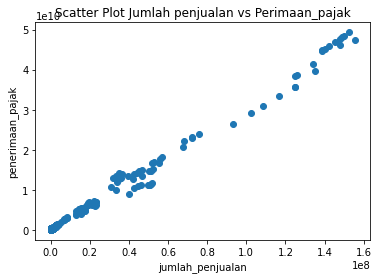

In [97]:
#Bivariate analysis jumlah penjualan dan penerimaan pajak.
#Menggunakan scatter plot.
plt.scatter(dataku['jumlah_penjualan'], dataku['penerimaan_pajak'])
plt.xlabel('jumlah_penjualan')
plt.ylabel('penerimaan_pajak')
plt.title('Scatter Plot Jumlah penjualan vs Perimaan_pajak')
plt.show()

In [98]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.99 termasuk kategori sangat tinggi.
dataku.corr()

,jumlah_penjualan,penerimaan_pajak
jumlah_penjualan,1.000000,0.995769
penerimaan_pajak,0.995769,1.000000


In [99]:
#Pertama, buat variabel x dan y.
dataX = dataku['jumlah_penjualan'].values.reshape(-1,1)
dataY = dataku['penerimaan_pajak'].values.reshape(-1,1)

In [100]:
#kita split data kita menjadi training and testing dengan porsi 80:20.
dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(dataX, dataY, test_size=0.2,random_state=0)

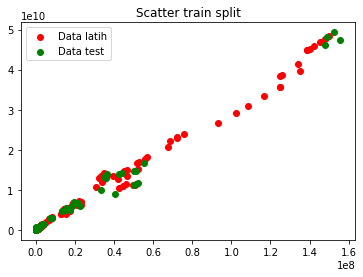

In [101]:
plt.scatter(dataX_train,dataY_train,label="Data latih",color='r')
plt.scatter(dataX_test,dataY_test,label="Data test",color='g')
plt.legend()
plt.title("Scatter train split")
plt.show()

In [102]:
# buat object liner regresi
Lin_Reg=LinearRegression()

#training the model menggunakan training data yang sudah displit sebelumnya.
Lin_Reg.fit(dataX_train,dataY_train)

#Melihat nilai slope/koef(m) dan intercept(b)
print("Koefisien(m): ",Lin_Reg.coef_)
print("Intercept(b): ",Lin_Reg.intercept_)

Koefisien(m):  [[308.12881705]]
Intercept(b):  [1.22959406e+08]


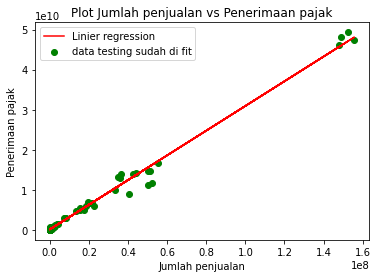

In [103]:
# visualisasi Regression Line menggunakan data testing.
y_prediksi = Lin_Reg.predict(dataX_test)
plt.scatter(dataX_test, dataY_test,label="data testing sudah di fit",c='g')
plt.plot(dataX_test, y_prediksi,label="Linier regression", c='r')
plt.xlabel('Jumlah penjualan')
plt.ylabel('Penerimaan pajak')
plt.title('Plot Jumlah penjualan vs Penerimaan pajak')
plt.legend()

In [108]:
df = pd.DataFrame({'Actual': dataY_test.flatten(), 'Predicted': y_prediksi.flatten()})
df.head(10)
#Tabel prediksi jumlah penjualan dengan penerimaan pajak

,Actual,Predicted
0,604557900,5.746763e+08
1,567757873,5.216781e+08
2,14110606896,1.372893e+10
3,34174912,1.476097e+08
4,1526249938,1.434048e+09
5,647626198,6.817442e+08
6,47398669009,4.807253e+10
7,466756155,1.457773e+08
8,6635130249,6.504923e+09
9,5005188385,5.527687e+09


In [109]:
Lin_Reg.predict([[100]])
#prediksi jumlah penjualan 100 dengan penerimaan pajak
#maka penerimaan pajaknya sebesar 1.22990219e+08

array([[1.22990219e+08]])

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(dataY_test, y_prediksi))  
print('Mean Squared Error:', metrics.mean_squared_error(dataY_test, y_prediksi))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dataY_test, y_prediksi)))


Mean Absolute Error: 547386811.7670481
Mean Squared Error: 1.1705353101210278e+18
Root Mean Squared Error: 1081912801.53302


In [107]:
Lin_Reg.score(dataX_test, dataY_test)
# Model kita mendapatkan accuracy score sebesar 99.07%

0.9907201765937957